In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', rc = {'figure.figsize':(16,8)})
matplotlib.rcParams['font.family']='Malgun Gothic'

# 전국 기초지자체(250) 단위 당 카페수, 인구수, 관광객 수

## 방문자수

In [2]:
광역시도 = ['서울', '부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주']

In [3]:
filenames=[]
for x in 광역시도:
    string = "../data/방문자수/"+x+".csv"
    filenames.append(string)

In [4]:
전국방문자수=pd.DataFrame()
for i,area in enumerate(광역시도):
    방문객 = pd.read_csv(filenames[i], names=['지역','구분','2018','2019','2020'], skiprows=lambda x: x%6 in [0,1,2,3,5])
    방문자수=pd.DataFrame(방문객['2020'])
    방문자수.index=방문객['지역']
    방문자수.columns=['방문자수']
    방문자수['광역시도']= [ area for x in range(len(방문자수))]
    전국방문자수 = pd.concat([전국방문자수, 방문자수], axis=0)

In [5]:
for i in range(len(전국방문자수)):
    전국방문자수.iloc[i]['방문자수'] = int(전국방문자수.iloc[i]['방문자수'].strip().replace(',', ''))

In [6]:
전국방문자수 = 전국방문자수.astype({'방문자수':'int64'})

In [7]:
buffer = list(전국방문자수.index)
buffer2 = []
for x in buffer:
    y = x.split(' ')
    if len(y) ==1:
        buffer2.append(y[0])
    else:
        buffer2.append(y[1])
전국방문자수.index = buffer2

In [8]:
전국방문자수.reset_index(inplace=True)
전국방문자수.columns=['지역','방문자수','광역시도']
전국방문자수

,지역,방문자수,광역시도
0,종로구,104456299,서울
1,중구,104341787,서울
2,용산구,80135295,서울
3,성동구,49796618,서울
4,광진구,60152790,서울
...,...,...,...
246,함양군,4654942,경남
247,거창군,6085586,경남
248,합천군,6472101,경남
249,제주시,45056317,제주


## 인구

In [9]:
filenames2=[]
for x in 광역시도:
    string = "../data/지역별 인구수/"+x+".csv"
    filenames2.append(string)

In [10]:
지역별인구=pd.DataFrame()
for i,area in enumerate(광역시도):
    인구 = pd.read_csv(filenames2[i], encoding='cp949', index_col='행정구역(시군구)별',skiprows=1)
    인구.columns=['인구수']
    인구['광역시도']= [ area for x in range(len(인구))]
    지역별인구 = pd.concat([지역별인구, 인구], axis=0)

In [11]:
지역별인구 = 지역별인구[지역별인구['인구수']!=0]

In [12]:
제거용=[
'수원시',
'성남시',
'안양시',
'안산시',
'고양시',
'용인시',
'청주시',
'천안시',
'전주시',
'포항시',
'창원시',
]

In [13]:
지역별인구.drop(labels=제거용, inplace=True)

In [14]:
지역별인구.reset_index(inplace=True)
지역별인구.columns=['지역','인구수','광역시도']
지역별인구

,지역,인구수,광역시도
0,종로구,149384,서울
1,중구,125240,서울
2,용산구,230040,서울
3,성동구,293556,서울
4,광진구,346682,서울
...,...,...,...
245,함양군,39080,경남
246,거창군,61502,경남
247,합천군,44006,경남
248,제주시,492466,제주


#### 방문객수보다 하나가 적다.

## 카페개수

In [15]:
filenames3=[]
for x in 광역시도:
    string = "../data/소상공인시장진흥공단_상가(상권)정보_20210630/소상공인시장진흥공단_상가(상권)정보_"+x+"_202106.csv"
    filenames3.append(string)
#filenames3

In [16]:
기초지자체당카페수=pd.DataFrame(dtype='int64')
for i,area in enumerate(광역시도):
    data = pd.read_csv(filenames3[i])
    cafe = data[data['상권업종소분류명']=='커피전문점/카페/다방']
    지역별카페수 = pd.DataFrame(cafe.groupby(['시군구명']).count()['상호명'])
    지역별카페수.columns=['카페개수']
    지역별카페수['광역시도']= [ area for x in range(len(지역별카페수))]
    기초지자체당카페수 = pd.concat([기초지자체당카페수, 지역별카페수], axis=0)
#기초지자체당카페수

C:\Users\scarl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
제거용2=[
'수원시',
'안산시',
'고양시',
'용인시',
'전주시',
'창원시',
]

In [18]:
기초지자체당카페수.drop(labels=제거용2, inplace=True)

In [19]:
buffer = list(기초지자체당카페수.index)
buffer2 = []
for x in buffer:
    y = x.split(' ')
    if len(y) ==1:
        buffer2.append(y[0])
    else:
        buffer2.append(y[1])
기초지자체당카페수.index = buffer2

In [20]:
기초지자체당카페수.reset_index(inplace=True)
기초지자체당카페수.columns=['지역','카페개수','광역시도']
기초지자체당카페수

,지역,카페개수,광역시도
0,강남구,2385,서울
1,강동구,788,서울
2,강북구,324,서울
3,강서구,1057,서울
4,관악구,738,서울
...,...,...,...
245,함안군,117,경남
246,함양군,68,경남
247,합천군,111,경남
248,서귀포시,998,제주


### 전체 합치기

In [21]:
최종데이터 = 기초지자체당카페수.merge(지역별인구, how='inner', on=['지역', '광역시도'])
최종데이터 = 최종데이터.merge(전국방문자수, how='inner', on=['지역', '광역시도'])
최종데이터

,지역,카페개수,광역시도,인구수,방문자수
0,강남구,2385,서울,539231,183522054
1,강동구,788,서울,459970,48577381
2,강북구,324,서울,308055,28958218
3,강서구,1057,서울,580185,60277663
4,관악구,738,서울,495060,47277054
...,...,...,...,...,...
244,함안군,117,경남,64182,9592572
245,함양군,68,경남,39080,4654942
246,합천군,111,경남,44006,6472101
247,서귀포시,998,제주,182169,33497116


In [22]:
최종데이터.corr()

,카페개수,인구수,방문자수
카페개수,1.000000,0.829954,0.871683
인구수,0.829954,1.000000,0.724216
방문자수,0.871683,0.724216,1.000000


In [23]:
최종데이터.to_csv('data/visitor_cafe_population.csv')

### seaborn 시각화

<AxesSubplot:title={'center':'heatmap of visitor cafe population'}>

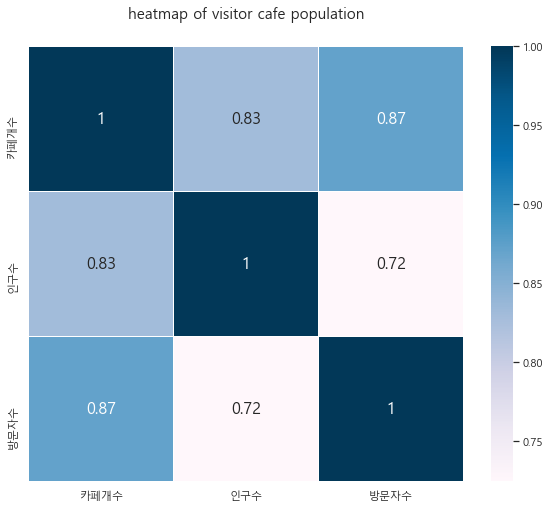

In [24]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("heatmap of visitor cafe population", y = 1.05, size = 15)
sns.heatmap(최종데이터.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

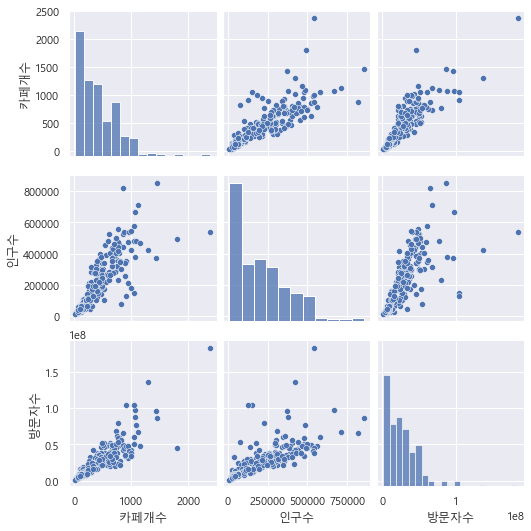

In [25]:
sns.pairplot(최종데이터)